In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import LambdaCallback

# Dataset

In [2]:
def linear_fn(x, w, b):
  """
  Define overall distribution of this random data
  x: feature
  w: weight
  b: bias
  """
  y = w * x + b
  return y

x = np.random.rand(100, 1) # random numbers from 0 to 1
y = linear_fn(x, 2, 1) + np.random.randn(100, 1) * .1

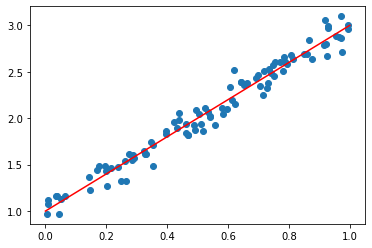

In [3]:
plt.scatter(x, y)
plt.plot([0, linear_fn(0, 2, 1)], [1, linear_fn(1, 2, 1)], 'r')
plt.show()
plt.close()

# Tensorflow2 Keras API

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="linear", input_shape=[1]),
  ])

In [5]:
optimizer = tf.keras.optimizers.SGD()
stored_weights = []
weights = LambdaCallback(on_epoch_end=lambda batch, logs: stored_weights.append(model.layers[0].get_weights()))
model.compile(loss='mean_squared_error',optimizer=optimizer)
history = model.fit(x,y,epochs=500, callbacks = [weights])

Epoch 1/500
4/4 [==============================] - 3s 9ms/step - loss: 3.7741
Epoch 2/500
4/4 [==============================] - 0s 10ms/step - loss: 2.9992
Epoch 3/500
4/4 [==============================] - 0s 6ms/step - loss: 2.4233
Epoch 4/500
4/4 [==============================] - 0s 4ms/step - loss: 1.9579
Epoch 5/500
4/4 [==============================] - 0s 3ms/step - loss: 1.5899
Epoch 6/500
4/4 [==============================] - 0s 3ms/step - loss: 1.2952
Epoch 7/500
4/4 [==============================] - 0s 3ms/step - loss: 1.0754
Epoch 8/500
4/4 [==============================] - 0s 3ms/step - loss: 0.8841
Epoch 9/500
4/4 [==============================] - 0s 3ms/step - loss: 0.7321
Epoch 10/500
4/4 [==============================] - 0s 3ms/step - loss: 0.5946
Epoch 11/500
4/4 [==============================] - 0s 3ms/step - loss: 0.4914
Epoch 12/500
4/4 [==============================] - 0s 3ms/step - loss: 0.4135
Epoch 13/500
4/4 [==============================] - 0s 3ms/s

In [ ]:
y_pred = model.predict(x).flatten()

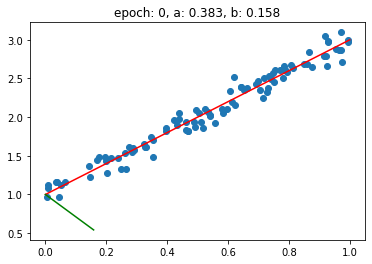

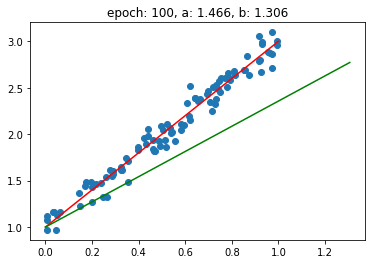

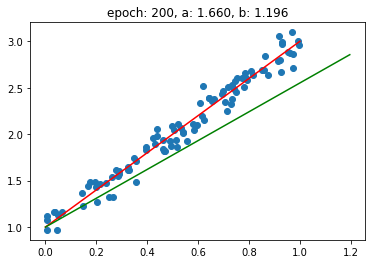

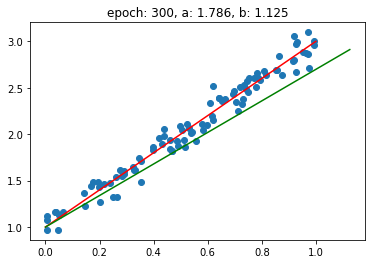

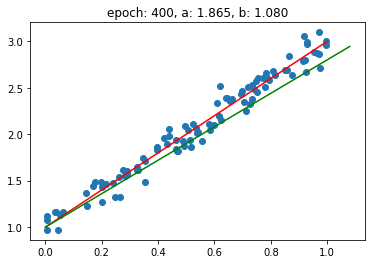

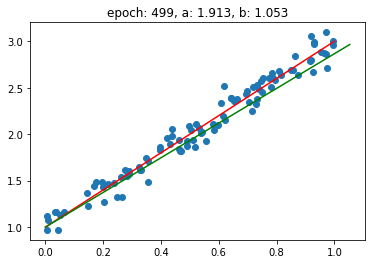

In [6]:
for i in range(0,len(stored_weights)+1,100):
  if i == len(stored_weights):
    i = 499
  w = stored_weights[i][0][0][0]
  b = stored_weights[i][1][0]
  plt.scatter(x, y)
  plt.plot([0, linear_fn(0, 2, 1)], [1, linear_fn(1, 2, 1)], 'r') # label
  plt.plot([0, linear_fn(0, w, b)], [1, linear_fn(1, w, b)], 'g') # predicted
  plt.title('epoch: %d, a: %.3f, b: %.3f'%(i, w, b))
  plt.show()
  plt.close()
